![logo](./img/LogoLine_horizon_C3S.png)

## Tutorial on computing monthly mean for 2m temperature using CARRA
Calculate the monthly mean of the downloaded data (downloading done in `CARRA_get_T2m.ipynb`).

Plot data as a map, a simple/fast plotting and one a bit more advanced.

It is also possible to plot monthly and daily means using monthly and daily means product from CARRA.
An example is presented in the notebook `CARRA_ERA5_time_series_anomaly.ipynb`.

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://mybinder.org/v2/gh/carlos9917/carra-training-c3s/main?labpath=CARRA_T2m_mean.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/carlos9917/carra-training-c3s/blob/main/CARRA_T2m_mean.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
    <th><a href="https://colab.research.google.com/github/carlos9917/carra-training-c3s/blob/main/CARRA_T2m_mean.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table>

### Libraries for working with multidimensional arrays
Import the needed libraries and define data paths.

In [14]:
import numpy as np
import xarray as xr
import os
import warnings
warnings.filterwarnings('ignore') #turn off some warnings
#Here it is assumed the data was already downloaded to the path below
DATADIR = 'CARRA'
period = "202403" #the period to reaad    
domain ="west" # label for the figure output
fCARRA = f'{DATADIR}/Raw_data/T2m_an_'+period+'.grb'

### Open CARRA data
Open the downloaded CARRA data, which is in GRIB-format, as a dataset in Python. Note that only the data is loaded but also the meta data connected with the data.

In [8]:
CARRA = xr.open_dataset(fCARRA)

### Compute monthly mean
With the data opened as a dataset there is the option to create a monthly mean easely.

In [9]:
print("Compute the mean")
CARRA_mean = CARRA.mean(dim="time", keep_attrs=True)
print("Done.")

Compute the mean
Done.


### Change longitudes from 0-360 to -180 to +180
That is needed for the plotting.

In [10]:
CARRA_mean = CARRA_mean.assign_coords(longitude=(((CARRA_mean.longitude + 180) % 360) - 180))

### Create an "Xarray Data Array" from the "Xarray Dataset"
That's an option for the simple plot option given below. Otherwise it is not needed to switch between "Data Array" and "Dataset".

In [11]:
CARRA_da = CARRA_mean['t2m']

### Change unit from K to C and add the unit to the attributes

In [12]:
CARRA_da_C = CARRA_da - 273.15
CARRA_da_C = CARRA_da_C.assign_attrs(CARRA_da.attrs)
CARRA_da_C.attrs['units'] = 'deg C'

### Simple plot
The data array can be plotted directly with the available plot function.
Note that things like the title and the colorbar including the units are set automatically based on the information in the metadata.
To save the plot, we import the package "matplotlib".

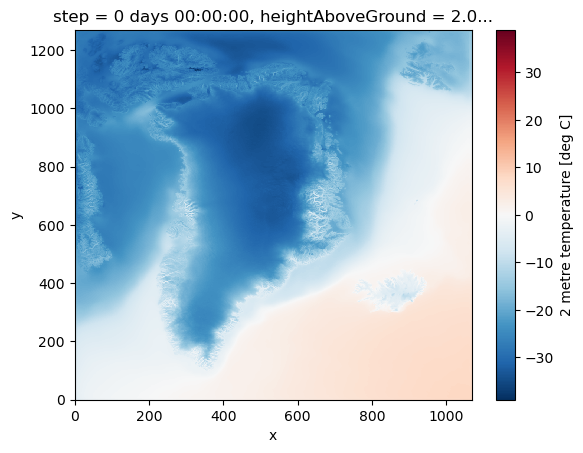

In [15]:
CARRA_da_C.plot()
PLOTS=os.path.join(DATADIR,"Figures")
if not os.path.isdir(PLOTS):
    os.makedirs(PLOTS)
    
import matplotlib.pyplot as plt
plt.savefig(os.path.join(PLOTS,'CARRA_'+domain+'_'+period+'_simple.png'))

### Figure 1. 2-meter mean air temperature for the period selected above in deg. Celsius. Over the ice sheet and the interior of the ice sheet in particular, the 2-meters temperature is well below zero. At the ice margin the temperature is close to zero, whereas the ice free land area in the southern part of Greenland has temperatures well above zero. The 2-meter temperature over the sea surface around Greenland does to a large extend reflect the sea surface temperature and the sea ice extent in the period selected above

### More advanced plotting with matplotlib and cartopy
With the help of matplotlib and cartopy, we produce a figure on a Lambert conformal projection. More features as for instance the costline are included in the plot, too. 

Start plotting maps


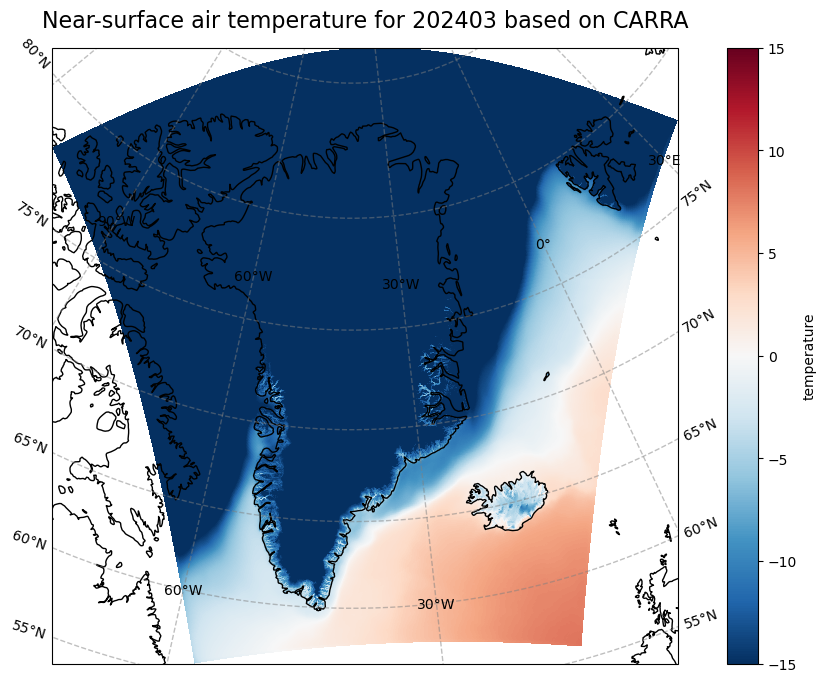

In [16]:
import cartopy.crs as ccrs

print("Start plotting maps")
# create the figure panel and the map using the Cartopy Lambert conformal projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.LambertConformal(central_latitude=70.0, central_longitude=-40.0)})

# Plot the data
im = plt.pcolormesh(CARRA_da_C.longitude, CARRA_da_C.latitude, CARRA_da_C, transform = ccrs.PlateCarree(), cmap='RdBu_r', vmin=-15, vmax=15) 

# Set the figure title
ax.set_title(f'Near-surface air temperature for {period} based on CARRA', fontsize=16)
ax.coastlines(color='black')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('temperature') 

# Save the figure
fig.savefig(os.path.join(PLOTS,'CARRA_'+domain+'_'+period+'.png'))

### Figure 2. As for figure 1, but plotted with a Lambert projection, with coastlines and with longitudes and latitudes on the axis